## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 7: Series de Tiempo**

Andrés C. Medina Sanhueza

Senior Data Scientist Engineer 

anmedinas@gmail.com

In [7]:
from matplotlib import pyplot as plt 
from scipy.stats import lognorm
import statsmodels.api as sm
import pandas_datareader.data as web 
import pandas as pd 
import seaborn as sns
import yfinance as yf
import numpy as np

sns.set_style("dark")

## 🐦‍🔥 Simulación Estadística

En un contexto estadístico, entendemos por simulación estadística, la técnica de muestreo estadístico controlado, que se utiliza conjuntamente con un modelo, para obtener respuestas aproximadas a preguntas que surgen en problemas complejos de tipo probabilístico. En definitiva, estudios de simulación son experimentos informáticos que implican la `creación de datos mediante un muestreo pseudoaleatorio a partir de distribuciones de probabilidad conocidas`. Son una herramienta invaluable para la investigación estadística, en particular para la evaluación de nuevos métodos y para la comparación de métodos alternativos.

En un contexto financiero, la simulación estadística es una técnica utilizada para modelar y analizar la incertidumbre y el riesgo en la toma de decisiones y proyecciones financieras. Se basa en la generación de múltiples escenarios aleatorios para evaluar diferentes resultados posibles y estimar las probabilidades de ocurrencia de esos resultados. Esta técnica es especialmente útil cuando hay factores inciertos o variables que no pueden ser controladas con precisión.

### 📌 Simulación de Monte Carlo

La Simulación de Monte Carlo es un método estadístico utilizado para modelar situaciones donde la incertidumbre y el riesgo juegan un papel importante. Se basa en la generación de múltiples escenarios aleatorios para calcular posibles resultados, proporcionando una visión probabilística de los resultados esperados.

Algunos conceptos claves, son los siguientes:

* **`Aleatoriedad`**: El método utiliza números aleatorios o pseudoaleatorios para generar escenarios posibles de una variable incierta, que luego se analizan para obtener una estimación probabilística de los resultados.

* **`Distribución de probabilidades`**: La simulación de Monte Carlo asume que las variables de interés siguen una distribución probabilística (por ejemplo, normal, log-normal, uniforme). Cada iteración de la simulación genera un valor para cada variable basado en su distribución asignada.

* **`Iteraciones múltiples`**: La simulación se ejecuta muchas veces (miles o millones de veces), lo que permite obtener una variedad de escenarios posibles. Al final, los resultados de estas simulaciones se agregan para analizar la distribución de los resultados posibles.

* **`Análisis de incertidumbre`**: Monte Carlo es ideal para situaciones donde no se puede predecir el resultado exacto debido a la incertidumbre de las variables involucradas. El objetivo es evaluar cómo la incertidumbre en las entradas afecta las salidas del modelo.

In [9]:
# Descargar precios históricos de Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start = '2015-01-01', end = '2024-01-01', progress = False)

# Obtener precios de cierre de Apple
closing_prices = data['Close']

# Ajustar y Graficar la distribución lognormal
shape, loc, scale = lognorm.fit(closing_prices)

In [11]:
closing_prices.values

array([[ 24.28858185],
       [ 23.60433197],
       [ 23.60655594],
       ...,
       [191.74580383],
       [192.17269897],
       [191.13032532]])

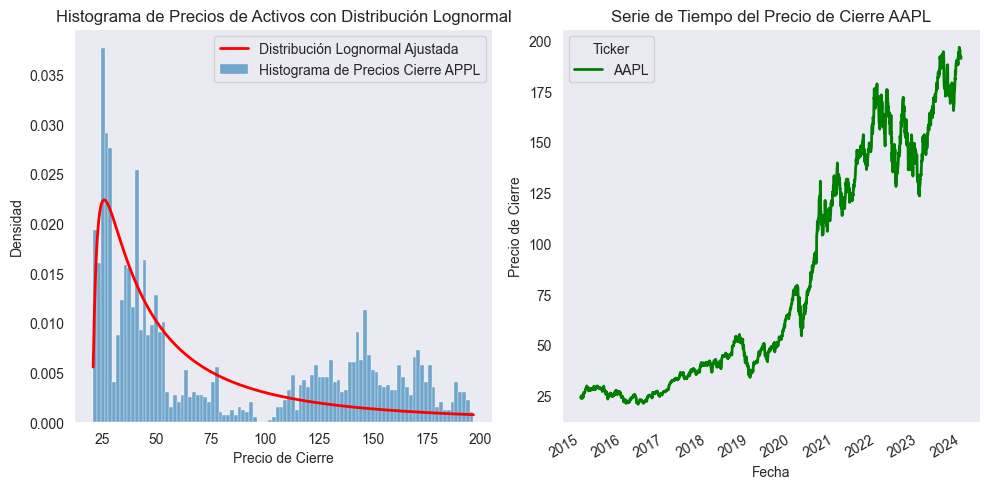

In [12]:
# Configuración de la figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# Subplot 1: Histograma de precios de cierre y distribución lognormal
sns.histplot(closing_prices.values, bins = 100, kde = False, ax = ax1, color = 'blue',
             stat = 'density', alpha = 0.6, label = 'Histograma de Precios Cierre APPL')
x = np.linspace(min(closing_prices.values), max(closing_prices.values), 1000)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)  # Densidad de probabilidad
ax1.plot(x, pdf, 'r-', lw=2, label='Distribución Lognormal Ajustada')
ax1.set_title('Histograma de Precios de Activos con Distribución Lognormal')
ax1.set_xlabel('Precio de Cierre')
ax1.set_ylabel('Densidad')
ax1.legend()

# Subplot 2: Serie de tiempo del precio del activo
data['Close'].plot(ax=ax2, color='green', lw=2)
ax2.set_title('Serie de Tiempo del Precio de Cierre AAPL')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio de Cierre')

# Ajustar el layout
plt.tight_layout()
plt.show()

### 📌 Modelos de Distribución Log-Normal

La relación entre los precios de los activos y la distribución lognormal se formalizó principalmente a través de la obra de los economistas y matemáticos en el siglo XX. Uno de los desarrollos más significativos fue el trabajo de `Louis Bachelier` en 1900, quien es considerado uno de los primeros en aplicar el análisis estocástico a los precios de los activos en su tesis doctoral **`Teoría de la especulación`**.

En dicha tesis, `Bachelier` propuso cinco aspectos claves:

1. **`Movimiento Aleatorio de los Precios`**: Los precios de los activos financieros se mueven de manera aleatoria, lo que significa que los cambios en los precios son impredecibles y no siguen un patrón predecible. Este concepto se formalizó a través de un proceso conocido como **`movimiento browniano`**, que describe la trayectoria de una partícula en un fluido en movimiento.

2. **`Distribución Normal de los Retornos`**: Bachelier asumió que los retornos (cambios en el precio) son normalmente distribuidos. Es decir, los cambios en el precio de un activo son el resultado de un proceso estocástico que sigue una distribución normal, lo que implica que los movimientos de precios pueden ser modelados usando estadísticas de media y varianza.

3. **`Cálculo de Opciones`**:
En su trabajo, Bachelier también introdujo conceptos que más tarde se utilizarían para el cálculo de precios de opciones. Su análisis incluía el valor de las opciones y su relación con la volatilidad de los precios subyacentes, aunque su enfoque era menos riguroso que el que se desarrollaría más tarde con el modelo de `Black-Scholes`.

4. **`Hipótesis de la Eficiencia del Mercado`**:
Esto implica que los especuladores no pueden obtener ganancias sistemáticas de los movimientos de precios ya que cualquier información nueva se incorpora rápidamente en los precios.

5. **`Implicaciones para la Especulación`**:
Bachelier describió la especulación como un juego de azar, donde los inversionistas buscan obtener ganancias a través de la compra y venta de activos basándose en sus expectativas sobre futuros movimientos de precios. Esto implica que, a largo plazo, la especulación puede ser riesgosa y no necesariamente rentable.

Algunas de las razones por la que los precios se distribuyen lognormales.

1. **`Crecimiento Compuesto`**: Los precios de los activos tienden a crecer de forma compuesta en el tiempo. Esto significa que, en lugar de crecer linealmente, el crecimiento se basa en el precio actual, lo que lleva a que los cambios porcentuales en los precios sigan un comportamiento multiplicativo. Cuando los retornos de los precios (es decir, los cambios porcentuales) son independientes y están distribuidos normalmente, el precio de los activos (resultado de aplicar cambios porcentuales) se distribuye lognormalmente.

2. **`Movimiento Browniano Geometrico`**: En la teoría financiera, se modela el comportamiento de los precios de los activos mediante el movimiento browniano geométrico. Este modelo asume que los retornos logarítmicos son normalmente distribuidos, lo que implica que los precios siguen una distribución lognormal.

3. **`Naturaleza de los Precios`**: Los precios de los activos no pueden ser negativos, lo que también favorece una distribución que se extiende hacia la derecha (cola a la derecha), característica de la distribución lognormal.

4. **`Observaciones Empiricas`** Estudios empíricos han demostrado que los precios de los activos en los mercados financieros suelen mostrar esta propiedad lognormal. Por ejemplo, análisis de precios de acciones, bienes raíces y otros activos han revelado que sus distribuciones se ajustan bien a la lognormal.


### 📌 Simulación de Precios de Activos 

#### Proceso de Wienner y Movimiento Browniano

Un proceso de **`Wiener`**, también conocido como `Movimiento Browniano`, es un proceso estocástico que describe el comportamiento aleatorio de una partícula en el tiempo.  

Formalmente, la definicion es la siguiente: Un proceso de Wienner $W(t)$ es una familia de variables aleatorias que cumplen con las siguientes propiedades:

1. **`Inicializacion`**: $W(0)=0$ casi seguramente, esto es que el proceso en el $t=0$ el valor del proceso es 0.

2. **`Incrementos Independientes`**: Para cualquier conjunto de tiempos $t_0\leq t_1 \leq t_2 \leq \cdots \leq t_n$ , los incrementos $W(t_2)-W(t_1), W(t_3)-W(t_2), W(t_4)-W(t_3),\cdots W(t_n)-W(t_{n-1})$ son independientes entre sí.

3. **`Incrementos Gaussianos`**: Los incrementos $W(t)-W(s)$, para $0\leq s \leq t$ tienen distribucion normal, esto es $W(t)-W(s) \sim \mathcal{N}(0, t-s)$, Esto significa que los incrementos tienen una media de cero y una varianza igual a la duración del intervalo de tiempo $t-s$.

4. **`Continuidad`**: La trayectoria del proceso de Wiener es continua casi seguramente. Aunque el proceso presenta movimientos aleatorios, no presenta saltos abruptos; es decir, no se interrumpe en ningún momento en el tiempo.

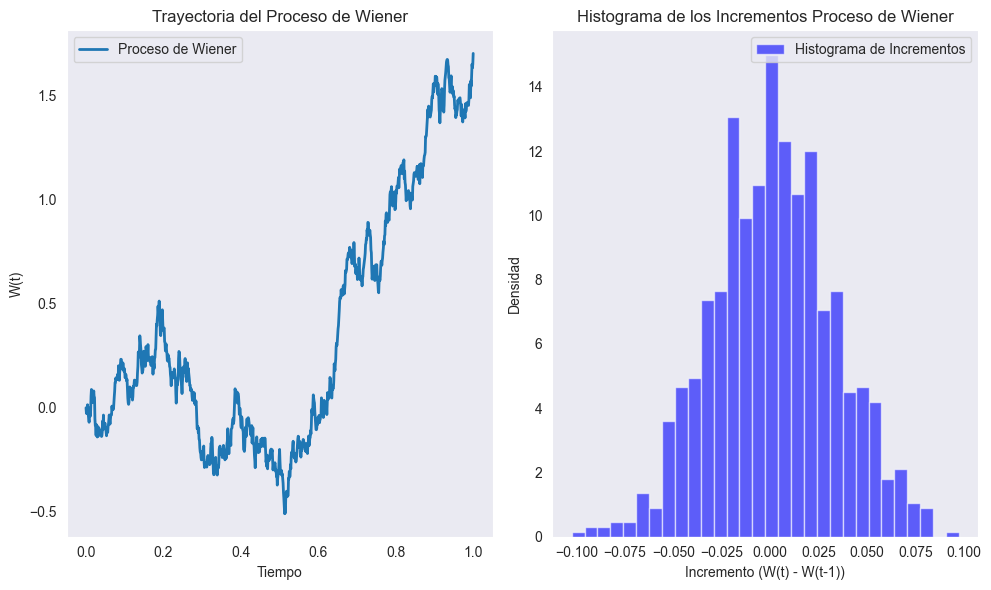

In [13]:
# Parámetros de la simulación
T = 1.0        # Tiempo total
N = 1000       # Número de pasos
dt = T / N     # Tamaño del paso
t = np.linspace(0, T, N + 1)  # Vector de tiempo

# Inicializar el proceso de Wiener
W = np.zeros(N + 1)

# Simular el proceso de Wiener
for i in range(1, N + 1):
    W[i] = W[i - 1] + np.random.normal(0, np.sqrt(dt))

# Calcular los Incrementos
increments = np.diff(W)  # Diferencias entre W(t) y W(t-1)

# Configuración de la figura y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))

# Subplot 1: Trayectoria del proceso de Wiener
ax1.plot(t, W, label='Proceso de Wiener', lw = 2)
ax1.set_title('Trayectoria del Proceso de Wiener')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('W(t)')
ax1.legend()

# Subplot 2: Histograma de los incrementos del proceso de Wiener
ax2.hist(increments, bins = 30, color = 'blue', alpha = 0.6, density = True,
         label = 'Histograma de Incrementos')
ax2.set_title('Histograma de los Incrementos Proceso de Wiener')
ax2.set_xlabel('Incremento (W(t) - W(t-1))')
ax2.set_ylabel('Densidad')
ax2.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Movimiento Browniano Geométrico

El `Movimiento Browniano Geométrico` se formalizó en el contexto del modelo de valoración de opciones de Fischer Black, Myron Scholes y Robert Merton en la década de 1970. Este modelo se utiliza para derivar la fórmula de Black-Scholes para la valoración de opciones, que asume que los precios de los activos siguen un `GBM`. Formalmente, `GBM` es un proceso estocástico que se describe mediante la siguiente ecuación diferencial estocástica (EDE):


\begin{equation*}
dS(t) = \mu S(t)dt + \sigma S(t) dW(t)
\end{equation*}

Donde:

* $S(t)$ es el precio del activo en el tiempo $t$.
* $\mu$ es la tasa de crecimiento esperada (drift) del activo.
* $\sigma$ es la volatilidad del activo (desviación estándar de los retornos).
* $dW(t)$ es el incremento de un proceso de Wiener (movimiento browniano) en el tiempo

Algunas propiedades:

* **`Log-Normalidad`**: La solución a la ecuación diferencial anterior indica que el logaritmo de los precios de los activos, $\log{(S(t))}$ sigue una distribución normal. Por lo tanto $S(t)$ tiene distribucion lognormal, esto es $S(t)\sim\hbox{LogNormal}(\tilde{\mu} t, \sigma^2 t)$ donde $\tilde{\mu} = \left(\mu-\frac{1}{2}\sigma^2 \right)$

* **`Continuidad`** El movimiento browniano geométrico tiene trayectorias continuas, lo que significa que no hay saltos en los precios del activo.

* **`No Negatividad`** Dado que los precios de los activos no pueden ser negativos, el movimiento browniano geométrico asegura que $S(t)$ tiene precio positivo.

La solucion general del `GBM` es

\begin{equation*}
S(t) = S(0)\exp\left( \left(\mu-\frac{1}{2}\sigma^2 \right)t + \sigma W(t)\right)
\end{equation*}

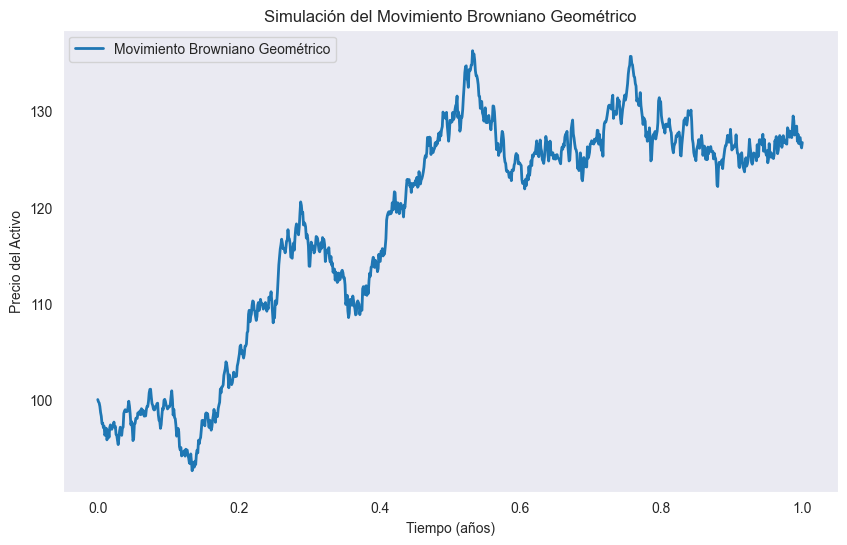

In [14]:
# Parámetros de la simulación
S0 = 100     # Precio inicial del activo
mu = 0.1     # Tasa de crecimiento esperada (drift)
sigma = 0.2  # Volatilidad del activo
T = 1.0      # Tiempo total (1 año)
N = 1000     # Número de pasos
dt = T / N   # Tamaño del paso
t = np.linspace(0, T, N + 1)  # Vector de tiempo

# Inicializar el precio del activo
S = np.zeros(N + 1)
S[0] = S0

# Simular el movimiento browniano geométrico
for i in range(1, N + 1):
    Z = np.random.normal(0, 1)  # Generar un número aleatorio de una normal estándar
    S[i] = S[i - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

# Graficar la trayectoria del movimiento browniano geométrico
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Movimiento Browniano Geométrico', lw=2)
plt.title('Simulación del Movimiento Browniano Geométrico')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio del Activo')
plt.legend()
plt.show()

/var/folders/nt/8nscwt3x5l1c4sllg6mw2zh80000gn/T/ipykernel_86455/2684234689.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S[i, j] = S[i - 1, j] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)


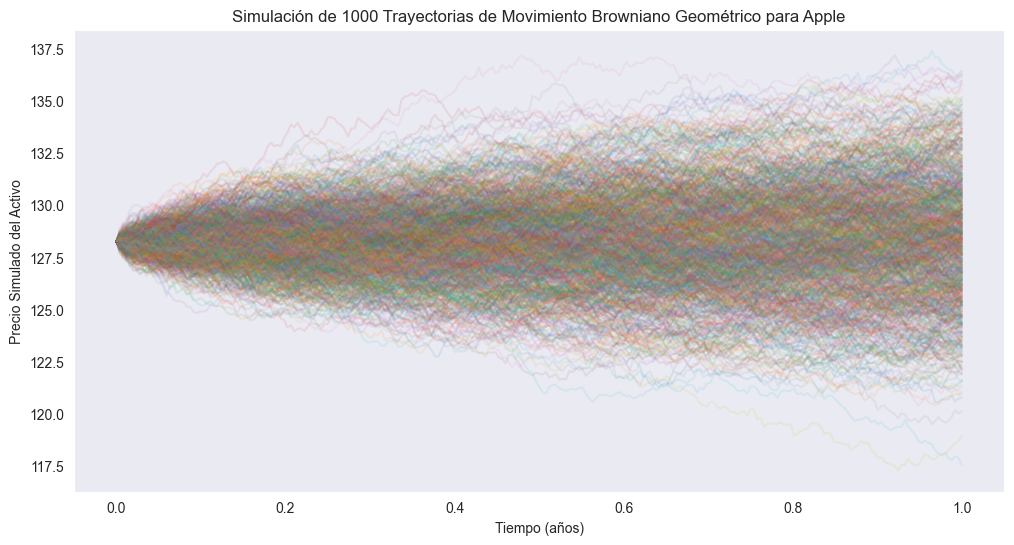

In [15]:
# Simulacion de Montecarlo para el GBM.

# 1. Descargar los datos de precios de cierre de Apple
ticker = 'AAPL'
data = yf.download(ticker, start = '2020-01-01', end = '2023-01-01', progress = False)
prices = data['Close']

# 2. Calcular la Tasa de Retorno y la Volatilidad
returns = prices.pct_change().dropna()
mu = returns.mean()    # Tasa de crecimiento esperada
sigma = returns.std()  # Volatilidad

# Parámetros de la simulación
S0 = prices.iloc[-1]  # Precio inicial (último precio de cierre)
T = 1.0               # Tiempo total (1 año)
N = 252               # Número de pasos (días de negociación)
dt = T / N            # Tamaño del paso
num_simulations = 1000  # Número de trayectorias a simular

# Inicializar el array para las trayectorias
S = np.zeros((N + 1, num_simulations))
S[0] = S0

# 3. Simular el Movimiento Browniano Geométrico
for j in range(num_simulations):
    for i in range(1, N + 1):
        Z = np.random.normal(0, 1)  # Generar un número aleatorio de una normal estándar
        S[i, j] = S[i - 1, j] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

# 4. Graficar las trayectorias simuladas
plt.figure(figsize=(12, 6))
for j in range(num_simulations):
    plt.plot(np.linspace(0, T, N + 1), S[:, j], alpha=0.1)  # Trayectorias individuales

plt.title('Simulación de 1000 Trayectorias de Movimiento Browniano Geométrico para Apple')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio Simulado del Activo')
plt.show()


#### Precios de Opciones

In [16]:
# Parámetros de la Opción
S0 = 100      # Precio inicial del activo subyacente
K = 105       # Precio de ejercicio (strike price)
T = 1.0       # Tiempo hasta el vencimiento (en años)
r = 0.05      # Tasa de interés libre de riesgo
sigma = 0.2   # Volatilidad del activo subyacente
num_simulations = 10000   # Número de simulaciones de Montecarlo
num_steps = 100           # Número de pasos en el tiempo

# Simulación de Trayectorias del Precio del Activo Subyacente
dt = T / num_steps  # Paso temporal
np.random.seed(42)  # Semilla para reproducibilidad

# Simulación del Precio del activo subyacente utilizando un GBM
def simulate_asset_price(S0, T, r, sigma, num_simulations, num_steps):
    prices = np.zeros((num_simulations, num_steps + 1))
    prices[:, 0] = S0
    for t in range(1, num_steps + 1):
        z = np.random.standard_normal(num_simulations)
        prices[:, t] = prices[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return prices

# Generar las Trayectorias de Precios Simuladas
simulated_prices = simulate_asset_price(S0, T, r, sigma, num_simulations, num_steps)

# Estimar el Precio de la Opción Europea de Compra
final_prices = simulated_prices[:, -1]
payoff = np.maximum(final_prices - K, 0)  # Payoff de la opción de compra
option_price = np.exp(-r * T) * np.mean(payoff)  # Descuento del payoff al valor presente

# Resultado
print(f"El precio estimado de la opción europea de compra es: {option_price:.2f}")


El precio estimado de la opción europea de compra es: 7.77


## 🍁 Series de Tiempo

Una serie de tiempo puede definirse como un `proceso estocástico` que genera una `secuencia de variables aleatorias indexadas en el tiempo`. En este contexto, una serie de tiempo es un conjunto de observaciones aleatorias que se recolectan secuencialmente a lo largo de un intervalo temporal. Formalmente, un proceso estocástico $\{X_t\}$ se define como una colección de variables aleatorias indexadas en el tiempo $t$, donde $t$ es un conjunto discreto.  

Algunas propiedades de las series de tiempo:

1. **`Dependencia Temporal`**: Las observaciones en una serie de tiempo no son independientes entre sí. Existe una relación o dependencia entre las observaciones en diferentes momentos de tiempo. Esta dependencia puede ser de corta o larga duración y se analiza mediante `funciones de autocorrelación`.

2. **`Estacionariedad`**: Un proceso estocástico puede ser estacionario si sus propiedades estadísticas no cambian con el tiempo. Para una serie de tiempo, esto significa que la media, la varianza y la autocorrelación son constantes a lo largo del tiempo. Hay diferentes tipos de estacionariedad, como la estacionariedad fuerte y la estacionariedad débil.

3. **`Estructura de Ruido`**: Las series de tiempo suelen incluir un componente de ruido o error que es aleatorio y no predecible. Este ruido puede seguir una distribución específica (como la normal) y puede influir en la variabilidad de las observaciones.

4. **`Modelos Específicos`**: Existen varios modelos para describir y analizar procesos estocásticos en series de tiempo, como el modelo autoregresivo (AR), el modelo de media móvil (MA), y el modelo ARIMA mencionado anteriormente. Estos modelos permiten capturar la estructura de dependencia en los datos.

###  Componentes de una serie temporal

Las series de tiempo, suelen descomponerse en cuatro componentes.

* `Tendencia` ($T$): Componente de largo plazo que muestra la dirección general de los datos.

* `Estacionalidad` ($S$): Componente que muestra patrones regulares y predecibles que se repiten en intervalos fijos de tiempo.

* `Ciclo` ($C$): Componente que muestra fluctuaciones irregulares en los datos a largo plazo que no son estacionales.

* `Ruido` ($N$): Componente aleatorio que no se puede explicar por los otros componentes.

Esto se puede expresar como:

\begin{equation*}
Y_t = T_t + S_t + C_t + N_t
\end{equation*}


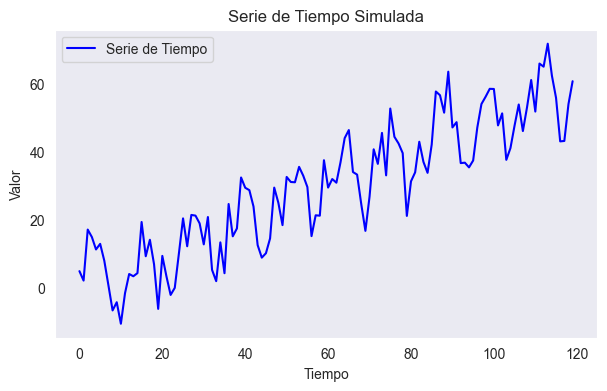

In [3]:
# Configuración de la semilla Aleatoria
np.random.seed(42)

# Parámetros de la Simulación
n = 120   # Número de observaciones (10 años mensuales)
t = np.arange(n)

# Componente de Tendencia (T)
trend = 0.5 * t

# Componente Estacional (senoidal) (S)
seasonal = 10 * np.sin(2 * np.pi * t / 12)

# Componente de Ciclo (aleatorio) (C)
cycle = 5 * np.random.randn(n)

# Componente de Ruido (N)
noise = np.random.normal(loc=0, scale=3, size=n)

# Generar la serie de tiempo
time_series = trend + seasonal + cycle + noise

# Crear un DataFrame
df = pd.DataFrame({
    'Time': t,
    'Value': time_series
})

# Visualizar la Serie de Tiempo
plt.figure(figsize = (7, 4))
plt.plot(df['Time'], df['Value'], label = 'Serie de Tiempo', color = 'blue')
plt.title('Serie de Tiempo Simulada')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

<Figure size 1400x1000 with 0 Axes>

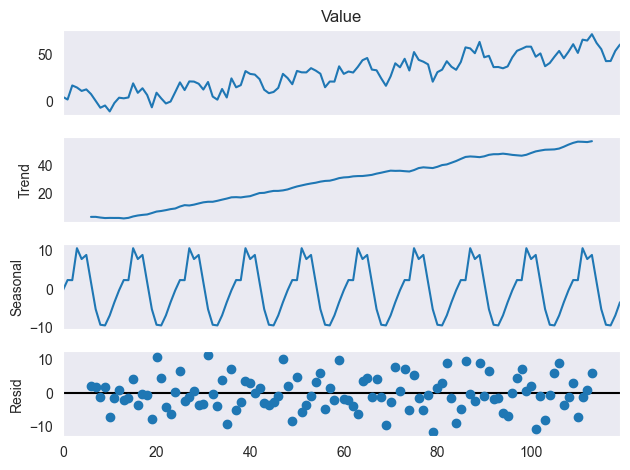

In [4]:
# Descomposición de la serie de tiempo
decomposition = sm.tsa.seasonal_decompose(df['Value'], model = 'additive', period = 12)

# Visualizar la descomposición
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.show()

## 🦚  Procesos Estacionarios 

### 📌 Ruido Blanco 

### 📌 Procesos AR

### 📌 Procesos MA

### 📌 Procesos ARMA

### 📌 Procesos ARIMA

##  🪲 Metodologia Box-Jenkins